In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Data Wrangling

### Gathering Data

In [6]:
movie_df = pd.read_csv("https://raw.githubusercontent.com/mhmdfikrii/Netflix-Movies-and-TV-Shows/main/dataset/netflix_titles.csv")
movie_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Assessing Data

In [7]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [8]:
len(movie_df.index)

8807

In [9]:
movie_df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [10]:
print("Jumlah duplikasi: ", movie_df.duplicated().sum())

Jumlah duplikasi:  0


In [11]:
movie_df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


### Cleaning Data

In [12]:
movie_df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [13]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [14]:
datetime_columns = ["date_added"]

for column in datetime_columns:
  movie_df[column] = pd.to_datetime(movie_df[column])

In [15]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [16]:
movie_df[movie_df["director"].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."
14,s15,TV Show,Crime Stories: India Detectives,NaN,NaN,NaN,2021-09-22,2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries",Cameras following Bengaluru police on the job ...
...,...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,NaN,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada",2018-05-01,2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...
8796,s8797,TV Show,Yunus Emre,NaN,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves..."
8797,s8798,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia",2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."


In [17]:
movie_df['director'].fillna(value='Unknown', inplace=True)

In [18]:
movie_df['cast'].fillna(value='Unknown', inplace=True)

In [19]:
movie_df['country'].fillna(value='Unknown', inplace=True)

In [20]:
movie_df['date_added'].value_counts()

2020-01-01    110
2019-11-01     91
2018-03-01     75
2019-12-31     74
2018-10-01     71
             ... 
2017-02-21      1
2017-02-07      1
2017-01-29      1
2017-01-25      1
2020-01-11      1
Name: date_added, Length: 1714, dtype: int64

In [21]:
movie_df['date_added'].fillna(value='January 1, 2020', inplace=True)

In [22]:
movie_df['rating'].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In [23]:
movie_df['rating'].fillna(value='TV-MA', inplace=True)

In [24]:
movie_df['duration'].value_counts()

1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: duration, Length: 220, dtype: int64

In [25]:
movie_df['duration'].fillna(value='1 Season', inplace=True)

In [26]:
movie_df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [27]:
movie_df.to_csv("NetflixDataset.csv", index=False)

# Exploratory Data Analysis (EDA)

In [28]:
movie_df.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5121,s5122,Movie,Christmas Inheritance,Ernie Barbarash,"Eliza Taylor, Jake Lacy, Andie MacDowell, Mich...",United States,2017-12-15,2017,TV-G,105 min,"Dramas, International Movies, Romantic Movies","To inherit her father's company, socialite Ell..."
7652,s7653,Movie,On Yoga The Architecture of Peace,Heitor Dhalia,Michael O’Neill,"Brazil, India, China, United States",2018-01-10,2017,TV-14,92 min,"Documentaries, Faith & Spirituality",Based on photographer Michael O’Neill’s book o...
6794,s6795,Movie,Frances Ha,Noah Baumbach,"Greta Gerwig, Mickey Sumner, Charlotte d'Amboi...","United States, Brazil",2017-10-01,2012,R,86 min,"Comedies, Dramas, Independent Movies",Determined to make it as a modern dancer in Ne...
5289,s5290,TV Show,A House of Blocks,Unknown,"Eli Shi, Phoebe Lin, Chen Wan-ting, Fan Chen-f...",Taiwan,2017-09-01,2017,TV-PG,1 Season,"International TV Shows, TV Dramas, TV Horror",Yijuan and her mentally ill sister Kaiqi strug...
154,s155,TV Show,Kuroko's Basketball,Unknown,"Kensho Ono, Yuki Ono, Chiwa Saito, Yoshimasa H...",Japan,2021-09-01,2015,TV-MA,3 Seasons,"Anime Series, International TV Shows, Teen TV ...",Five middle school basketball stars went to se...


In [29]:
movie_df.describe(include="all")

<ipython-input-29-30c9fba324d9>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  movie_df.describe(include="all")


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,8807,8807,8807,8807,8807.000000,8807,8807,8807,8807
unique,8807,2,8807,4529,7693,749,1714,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Unknown,Unknown,United States,2020-01-01 00:00:00,NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,2634,825,2818,120,NaN,3211,1796,362,4
first,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-25 00:00:00,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN


### Apakah Netflix lebih fokus pada acara TV daripada film dalam beberapa tahun terakhir?

In [30]:
movie_df['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [112]:
movie_count_movie_type = movie_df[movie_df['type'] == 'Movie']['type'].value_counts()

print("Jumlah data tipe 'Movie':", movie_count_movie_type.values[0])

Jumlah data tipe 'Movie': 6131


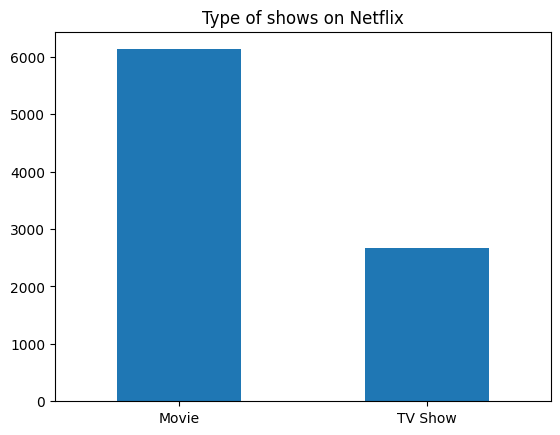

In [31]:
movie_df['type'].value_counts().plot(kind='bar', title='Type of shows on Netflix', rot=0)

plt.show()

### Ambil 10 sutradara teratas berdasarkan jumlah film yang dibuat dari kumpulan data.

In [114]:
movie_df.loc[movie_df['type'] == 'Movie', 'director'].value_counts().reset_index().head(10)

,index,director
0,Unknown,188
1,Rajiv Chilaka,19
2,"Raúl Campos, Jan Suter",18
3,Suhas Kadav,16
4,Marcus Raboy,15
5,Jay Karas,14
6,Cathy Garcia-Molina,13
7,Martin Scorsese,12
8,Jay Chapman,12
9,Youssef Chahine,12


### Berapa banyak negara yang telah memproduksi film?

In [33]:
movie_df.loc[movie_df['type'] == 'Movie','country'].nunique()

652

In [34]:
movie_df['country'].value_counts().reset_index().head(10)

,index,country
0,United States,2818
1,India,972
2,Unknown,831
3,United Kingdom,419
4,Japan,245
5,South Korea,199
6,Canada,181
7,Spain,145
8,France,124
9,Mexico,110


In [35]:
movie_df['country'].value_counts()

United States                             2818
India                                      972
Unknown                                    831
United Kingdom                             419
Japan                                      245
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 749, dtype: int64

### Pada tahun berapa produksi film paling sedikit terjadi?

In [36]:
movie_df.loc[movie_df['type'] == 'Movie','release_year'].value_counts()

2017    767
2018    767
2016    658
2019    633
2020    517
       ... 
1966      1
1961      1
1946      1
1963      1
1947      1
Name: release_year, Length: 73, dtype: int64

### Acara TV dengan durasi/season terbanyak

In [37]:
movie_df.loc[movie_df['type'] == 'TV Show', ['duration']].value_counts().reset_index(name="count")

,duration,count
0,1 Season,1793
1,2 Seasons,425
2,3 Seasons,199
3,4 Seasons,95
4,5 Seasons,65
5,6 Seasons,33
6,7 Seasons,23
7,8 Seasons,17
8,9 Seasons,9
9,10 Seasons,7


In [38]:
movie_df.loc[movie_df['duration'] == '17 Seasons', :]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
548,s549,TV Show,Grey's Anatomy,Unknown,"Ellen Pompeo, Sandra Oh, Katherine Heigl, Just...",United States,2021-07-03,2020,TV-14,17 Seasons,"Romantic TV Shows, TV Dramas",Intern (and eventual resident) Meredith Grey f...


### Berapa banyak film yang diproduksi dalam 10 tahun terakhir?

In [39]:
movie_df.loc[(movie_df['type'] == 'Movie') & (movie_df['release_year'] > 2013)].shape[0]

4281

### Negara mana yang memproduksi paling banyak film?

In [115]:
movie_df.loc[movie_df['type'] == 'Movie','country'].value_counts().head(10)

United States     2058
India              893
Unknown            440
United Kingdom     206
Canada             122
Spain               97
Egypt               92
Nigeria             86
Indonesia           77
Turkey              76
Name: country, dtype: int64

### Apa rating paling populer dalam acara TV & Film?

In [41]:
movie_df.loc[movie_df['type'] == 'TV Show', 'rating'].value_counts().reset_index()

,index,rating
0,TV-MA,1147
1,TV-14,733
2,TV-PG,323
3,TV-Y7,195
4,TV-Y,176
5,TV-G,94
6,NR,5
7,R,2
8,TV-Y7-FV,1


In [80]:
movie_df.loc[movie_df['type'] == 'Movie', 'rating'].value_counts().reset_index()

,index,rating
0,TV-MA,2064
1,TV-14,1427
2,R,797
3,TV-PG,540
4,PG-13,490
5,PG,287
6,TV-Y7,139
7,TV-Y,131
8,TV-G,126
9,NR,75


In [98]:
movie_ratings_movie_type = movie_df.loc[movie_df['type'] == 'Movie', 'rating']

jumlah_rating = movie_ratings_movie_type.nunique()

print(f"Jumlah rating pada Film adalah {jumlah_rating}")

Jumlah rating pada Film adalah 17


### Pada tahun berapa film dengan rating Dewasa paling banyak diproduksi?

In [42]:
movie_rating = movie_df.loc[(movie_df['type'] == 'Movie') & (movie_df['rating'] == 'TV-MA')]

In [43]:
movie_rating.loc[: ,'release_year'].value_counts()

2018    358
2017    338
2019    286
2016    273
2020    220
2015    136
2021    110
2014     62
2013     48
2012     41
2010     33
2008     20
2011     20
2006     13
2007     12
2003      8
2004      8
2009      8
1998      7
1991      5
2002      5
2005      4
1999      4
1983      4
1993      3
1990      3
1997      3
1992      3
1978      2
1975      2
2001      2
1982      2
1989      2
1979      2
1985      2
1963      1
1981      1
1984      1
1945      1
1973      1
1976      1
1986      1
1988      1
1970      1
1994      1
1977      1
2000      1
1972      1
1987      1
1967      1
Name: release_year, dtype: int64

### Siapa sutradara film paling populer dari India?

In [44]:
pop_dir = movie_df.loc[(movie_df['country'] == 'India') & (movie_df['type'] == 'Movie')]

In [45]:
pop_dir.loc[: , 'director'].value_counts()

Unknown             12
David Dhawan         9
Ram Gopal Varma      7
Imtiaz Ali           6
Anees Bazmee         6
                    ..
Manu Ashokan         1
Saurabh Sinha        1
Sunil Thakur         1
Rai Yuvraj Bains     1
Mozez Singh          1
Name: director, Length: 638, dtype: int64

### Film apa yang memiliki durasi terpendek sepanjang tahun?

In [46]:
movie_df.loc[(movie_df['type'] == 'Movie') & (movie_df['duration'] == '8 min')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1484,s1485,Movie,Cops and Robbers,"Arnon Manor, Timothy Ware-Hill",Timothy Ware-Hill,United States,2020-12-28,2020,PG-13,8 min,Dramas,Animation and activism unite in this multimedi...


### Apakah ada acara TV baru yang dirilis pada tahun 2020? Benar/Salah?

In [47]:
release_2020 = movie_df.loc[(movie_df['type'] == 'TV Show') & (movie_df['release_year'] == 2020)]

In [48]:
release_2020['type'].value_counts()

TV Show    436
Name: type, dtype: int64

### Berapa banyak kategori rating yang ada?

In [49]:
movie_df.loc[:, 'rating'].nunique()

17

### Apakah Amerika Serikat membuat lebih banyak film atau acara TV?

In [50]:
movie_df.loc[(movie_df['country'] == 'United States') & (movie_df['type'] == 'TV Show'), 'title'].nunique()

760

In [51]:
movie_df.loc[(movie_df['country'] == 'United States') & (movie_df['type'] == 'Movie'), 'title'].nunique()

2058

In [52]:
movie_df.loc[(movie_df['country'] == 'United States'), 'type'].value_counts()

Movie      2058
TV Show     760
Name: type, dtype: int64

### Apakah Amerika Serikat membuat film yang lebih panjang daripada India?

In [53]:
movie_df['duration_int'] = movie_df['duration'].str.extract(r'(\d+)')
movie_df['duration_int'] = movie_df['duration_int'].fillna(0).astype(int)
movie_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_int
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",158
8803,s8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,88
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",88


In [54]:
data_movies = movie_df[['type', 'country', 'duration_int']].query("type == 'Movie' and country in ('United States', 'India')")
data_movies.head()

,type,country,duration_int
0,Movie,United States,90
9,Movie,United States,104
24,Movie,India,166
27,Movie,United States,103
28,Movie,United States,97


In [55]:
data_movies.groupby('country')['duration_int'].mean()

country
India            126.922732
United States     90.499028
Name: duration_int, dtype: float64

### Sutradara mana yang memproduksi setidaknya satu film pada tahun 2021?

In [56]:
release_year = movie_df.loc[(movie_df['type'] == 'Movie') & (movie_df['release_year'] == 2021)]

In [57]:
pd.DataFrame(release_year.loc[:, 'director']).value_counts()

director                
Unknown                     25
Rathindran R Prasad          4
Leigh Janiak                 3
Chapman Way, Maclain Way     2
Prakash Satam                2
                            ..
Hemambar Jasti               1
Ivan Ayr                     1
J Blakeson                   1
Jakub Piątek                 1
Zhao Ji                      1
Length: 242, dtype: int64

### Berapa banyak acara TV dan film unik yang ada dalam kumpulan data?

In [58]:
movie_df.groupby('type').nunique().loc[:, 'title']

type
Movie      6131
TV Show    2676
Name: title, dtype: int64

### Berapa banyak acara TV dan film yang ada per negara?

In [59]:
movie_df.groupby(['country', 'type']).nunique().loc[:, 'title']

country                                              type   
, France, Algeria                                    Movie       1
, South Korea                                        TV Show     1
Argentina                                            Movie      38
                                                     TV Show    18
Argentina, Brazil, France, Poland, Germany, Denmark  Movie       1
                                                                ..
Venezuela                                            Movie       1
Venezuela, Colombia                                  Movie       1
Vietnam                                              Movie       7
West Germany                                         Movie       1
Zimbabwe                                             Movie       1
Name: title, Length: 849, dtype: int64

### Berapa banyak film dan acara TV yang ditambahkan ke Netflix setiap tahun?

In [60]:
movie_df.groupby(['type', 'release_year']).nunique().loc[:, 'title'].reset_index()

,type,release_year,title
0,Movie,1942,2
1,Movie,1943,3
2,Movie,1944,3
3,Movie,1945,3
4,Movie,1946,1
...,...,...,...
114,TV Show,2017,265
115,TV Show,2018,380
116,TV Show,2019,397
117,TV Show,2020,436


### Berapa rata-rata durasi film yang dirilis setiap tahun?

In [61]:
movie_df['duration_int'] = movie_df['duration'].str.extract(r'(\d+)')
movie_df['duration_int'] = movie_df['duration_int'].fillna(0).astype(int)
movie_yearwise = movie_df.loc[(movie_df['type'] == 'Movie')]
movie_yearwise = movie_yearwise.groupby(['release_year'])['duration_int'].mean().reset_index()
movie_yearwise

,release_year,duration_int
0,1942,35.000000
1,1943,62.666667
2,1944,52.000000
3,1945,51.333333
4,1946,58.000000
...,...,...
68,2017,95.411995
69,2018,96.185137
70,2019,93.466035
71,2020,92.141199


### Apa rating paling umum untuk film dan acara TV dalam kumpulan data?

In [62]:
data_agg = movie_df.groupby(['type', 'rating'])['title'].nunique().reset_index()
data_agg.query("type == 'Movie'").nlargest(n=1, columns='title')

,type,rating,title
11,Movie,TV-MA,2064


In [63]:
data_agg.query("type == 'TV Show'").nlargest(n=1, columns='title')

,type,rating,title
21,TV Show,TV-MA,1147


### Berapa banyak film dan acara TV yang ada untuk setiap kategori rating?

In [64]:
data_grouped = movie_df.groupby(['type', 'rating']).size().reset_index(name='count')
data_grouped

,type,rating,count
0,Movie,66 min,1
1,Movie,74 min,1
2,Movie,84 min,1
3,Movie,G,41
4,Movie,NC-17,3
5,Movie,NR,75
6,Movie,PG,287
7,Movie,PG-13,490
8,Movie,R,797
9,Movie,TV-14,1427


In [65]:
pd.pivot_table(data=data_grouped, index='rating', columns='type', values='count', fill_value=0)

type,Movie,TV Show
rating,,
66 min,1,0
74 min,1,0
84 min,1,0
G,41,0
NC-17,3,0
NR,75,5
PG,287,0
PG-13,490,0
R,797,2


### Negara mana yang telah memproduksi jumlah film terbanyak?

In [66]:
num_movie = movie_df.loc[(movie_df['type'] == 'Movie')]
num_movie = num_movie.groupby(['country'])['title'].count().sort_values(ascending=False)
num_movie

country
United States      2058
India               893
Unknown             440
United Kingdom      206
Canada              122
                   ... 
India, Mexico         1
India, Malaysia       1
India, Japan          1
India, Iran           1
Zimbabwe              1
Name: title, Length: 652, dtype: int64

### Negara mana yang telah memproduksi jumlah acara TV terbanyak?

In [67]:
num_tvshow = movie_df.loc[(movie_df['type'] == 'TV Show')]
num_tvshow = num_tvshow.groupby('country')['title'].count().sort_values(ascending=False)
num_tvshow

country
United States                                                  760
Unknown                                                        391
United Kingdom                                                 213
Japan                                                          169
South Korea                                                    158
                                                              ... 
Italy, Canada, France                                            1
Italy, Germany                                                   1
Italy, South Africa, West Germany, Australia, United States      1
Italy, United Kingdom                                            1
Uruguay, Germany                                                 1
Name: title, Length: 197, dtype: int64

### Tahun mana yang merupakan tahun rilis terawal dan terbaru dalam kumpulan data?

In [68]:
movie_df.loc[:, 'release_year'].sort_values().reset_index()

,index,release_year
0,4250,1925
1,7790,1942
2,8205,1942
3,8660,1943
4,8739,1943
...,...,...
8802,862,2021
8803,861,2021
8804,857,2021
8805,876,2021


In [69]:
movie_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_int
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2


### Berapa banyak film dan acara TV yang ditambahkan ke Netflix setiap bulan?

In [70]:
movie_df['month_added'] = pd.to_datetime(movie_df['date_added'], format='mixed')
movie_df['month_added'] = movie_df['month_added'].dt.strftime('%B') #this is for movie_df needed in string form in a new column.
movie_df.groupby(['type','month_added'])['title'].count().reset_index(name="count")

,type,month_added,count
0,Movie,April,550
1,Movie,August,519
2,Movie,December,547
3,Movie,February,382
4,Movie,January,546
5,Movie,July,565
6,Movie,June,492
7,Movie,March,529
8,Movie,May,439
9,Movie,November,498


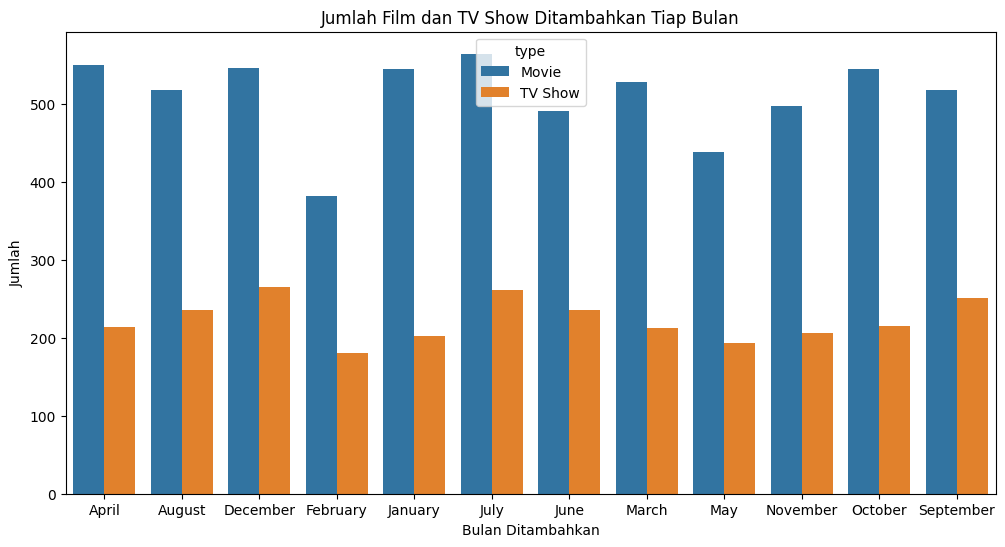

In [101]:
movie_df['month_added'] = pd.to_datetime(movie_df['date_added'], errors='coerce')

# Ekstraksi bulan dari tanggal dan konversi ke string
movie_df['month_added'] = movie_df['month_added'].dt.strftime('%B')

# Groupby berdasarkan 'type' dan 'month_added', hitung jumlah 'title' untuk setiap grup
grouped_data = movie_df.groupby(['type', 'month_added'])['title'].count().reset_index(name="count")

# Membuat bar plot menggunakan Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='month_added', y='count', hue='type', data=grouped_data)
plt.title('Jumlah Film dan TV Show Ditambahkan Tiap Bulan')
plt.xlabel('Bulan Ditambahkan')
plt.ylabel('Jumlah')
plt.show()

### Durasi yang paling umum untuk film dalam kumpulan data adalah berapa lama?*teks yang dimiringkan*

In [71]:
movie_ds = movie_df.loc[(movie_df['type'] == 'Movie')]
movie_ds = movie_ds.groupby('duration')['title'].nunique().reset_index()
movie_ds = movie_ds.rename(columns={'title': 'number_of_titles'})
movie_ds.sort_values('number_of_titles', ascending=False)

,duration,number_of_titles
196,90 min,152
200,94 min,146
199,93 min,146
203,97 min,146
197,91 min,144
...,...,...
107,203 min,1
106,201 min,1
105,200 min,1
101,194 min,1


### Berapa jumlah musim acara TV yang paling umum dalam kumpulan data?

In [72]:
x = movie_df.loc[(movie_df['type'] == 'TV Show')]
x.groupby('duration').nunique()

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,duration_int,month_added
duration,,,,,,,,,,,,,
1 Season,1793,1,1793,179,1477,140,809,41,8,186,1790,1,12
10 Seasons,7,1,7,1,7,4,7,5,5,7,7,1,6
11 Seasons,2,1,2,1,2,1,2,2,1,1,2,1,2
12 Seasons,2,1,2,1,2,2,2,2,2,2,2,1,2
13 Seasons,3,1,3,1,3,2,3,2,3,3,3,1,2
15 Seasons,2,1,2,2,2,2,2,2,1,2,2,1,2
17 Seasons,1,1,1,1,1,1,1,1,1,1,1,1,1
2 Seasons,425,1,425,22,385,75,314,23,7,113,425,1,12
3 Seasons,199,1,199,5,180,49,169,16,7,85,198,1,12


In [73]:
movie_df.query("title == 'Kota Factory'")

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_int,month_added
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2,September


### Berapa banyak sutradara unik yang ada dalam kumpulan data?

In [74]:
movie_df.groupby('director')['title'].nunique().count()

4529

### Tahun rilis yang paling umum untuk film dan acara TV dalam kumpulan data adalah berapa?

In [75]:
data_peryear = movie_df.groupby('type')['release_year'].value_counts().reset_index(name='count')
data_peryear
data_peryear.query("type == 'Movie'").nlargest(n=1, columns='count')

,type,release_year,count
0,Movie,2017,767


In [76]:
data_peryear.query("type == 'TV Show'").nlargest(n=1, columns='count')

,type,release_year,count
73,TV Show,2020,436


### Berapa banyak film dan acara TV yang diproduksi oleh setiap negara per tahun?

In [77]:
movie_df.groupby(['type', 'country']).size().reset_index(name='count')

,type,country,count
0,Movie,", France, Algeria",1
1,Movie,Argentina,38
2,Movie,"Argentina, Brazil, France, Poland, Germany, De...",1
3,Movie,"Argentina, Chile",2
4,Movie,"Argentina, Chile, Peru",1
...,...,...,...
844,TV Show,"United States, Sweden",1
845,TV Show,"United States, United Kingdom",9
846,TV Show,"United States, United Kingdom, Australia",1
847,TV Show,Unknown,391


### Berapa banyak film dan acara TV yang ada untuk setiap kategori rating per tahun?

In [78]:
movie_df.groupby(['type', 'rating','release_year']).size().reset_index(name='count')

,type,rating,release_year,count
0,Movie,66 min,2015,1
1,Movie,74 min,2017,1
2,Movie,84 min,2010,1
3,Movie,G,1956,1
4,Movie,G,1958,1
...,...,...,...,...
559,TV Show,TV-Y7,2018,27
560,TV Show,TV-Y7,2019,22
561,TV Show,TV-Y7,2020,26
562,TV Show,TV-Y7,2021,20


### Berapa banyak film dan acara TV yang disutradarai oleh setiap sutradara per tahun?

In [79]:
data_peryear = movie_df.groupby(['type', 'director','release_year','title']).size().reset_index(name='count')
data_peryear

,type,director,release_year,title,count
0,Movie,A. L. Vijay,2016,Abhinetri,1
1,Movie,A. L. Vijay,2019,Watchman,1
2,Movie,A. Raajdheep,2020,Asura Guru,1
3,Movie,A. Salaam,1975,Salaakhen,1
4,Movie,A.R. Murugadoss,2017,Spyder,1
...,...,...,...,...,...
8802,TV Show,Vijay S. Bhanushali,2019,Bal Ganesh,1
8803,TV Show,"Vikramaditya Motwane, Anurag Kashyap",2019,Sacred Games,1
8804,TV Show,Wouter Bouvijn,2019,The Twelve,1
8805,TV Show,Yasuhiro Irie,2010,Fullmetal Alchemist: Brotherhood,1


# Visualization & Explanatory Analysis